In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits


# dbfile = '/home/martin/work/Projects/CS20hackday/Praesepe.fits'
dbfile = os.path.expanduser("~/Dropbox/data/Gaia/Praesepe_cut.fits.gz")
with fits.open(dbfile) as hdu:
    data = hdu[1].data

In [2]:
memprob = data['HDBscan_MemProb']
cluster = data['HDBscan_Cluster']

idx = (memprob >= 0.1) * (cluster == 1)

gaia_ra = data['gaia_dr2_source.ra'][idx]
gaia_dec = data['gaia_dr2_source.dec'][idx]

gaia_pmra = data['gaia_dr2_source.pmra'][idx]
gaia_pmdec = data['gaia_dr2_source.pmdec'][idx]

gaia_parallax = data['gaia_dr2_source.parallax'][idx]

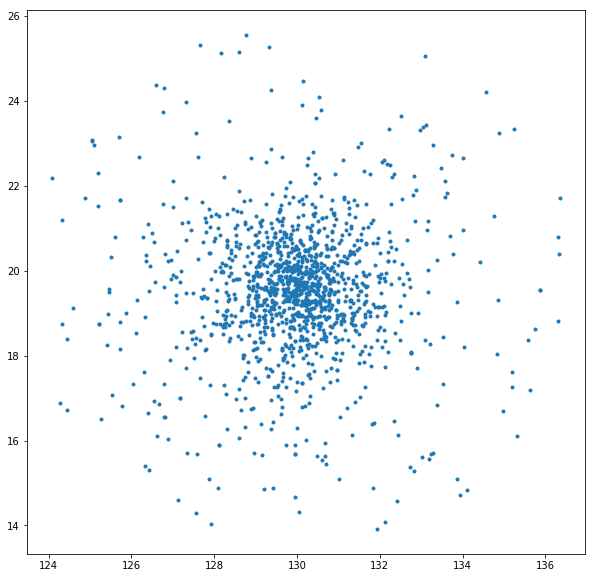

In [3]:
plt.figure(figsize = (10,10))
plt.plot(gaia_ra,gaia_dec,'.')

In [5]:
from sklearn import cluster

arr = np.vstack((gaia_parallax,gaia_pmra,gaia_pmdec)).T

kmeans = cluster.KMeans(n_clusters = 2)

kmeans.fit(arr)

g0 = kmeans.labels_ == 0
g1 = kmeans.labels_ == 1


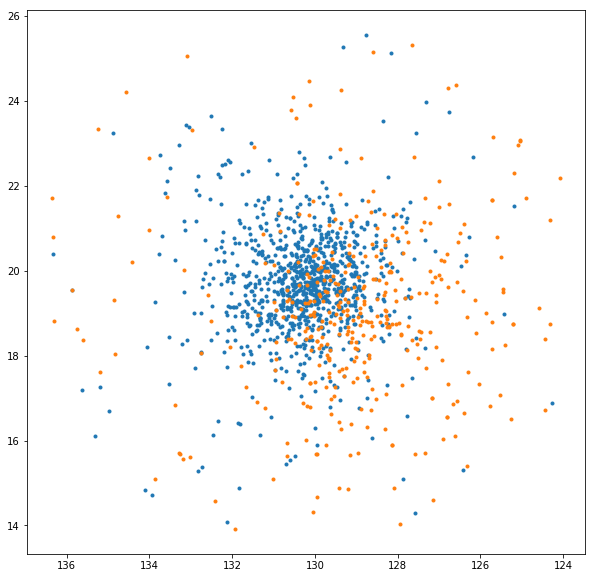

In [6]:
plt.figure(figsize = (10,10))
plt.plot(gaia_ra[g0],gaia_dec[g0],'.')
plt.plot(gaia_ra[g1],gaia_dec[g1],'.')
plt.gca().invert_xaxis()

In [7]:
import corner

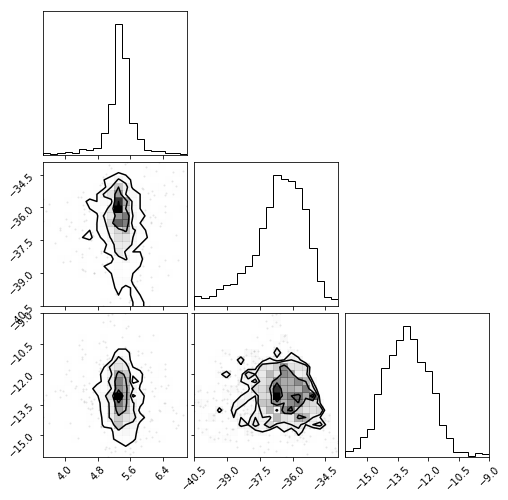

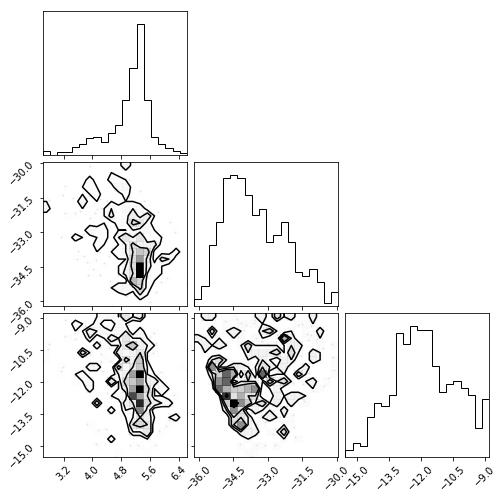

In [8]:
fig0 = corner.corner(arr[g0])
fig1 = corner.corner(arr[g1])

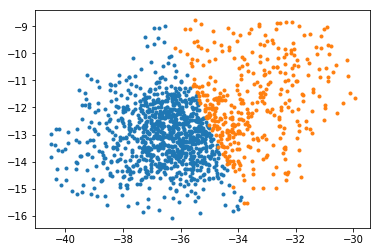

In [10]:
plt.plot(gaia_pmra[g0],gaia_pmdec[g0],'.')
plt.plot(gaia_pmra[g1],gaia_pmdec[g1],'.')